In [1]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
url = 'https://ycharts.com/companies/TSLA/revenues'

html_data = requests.get(url,time.sleep(5)).text

if "403 ERROR" in html_data:
    headers = {'User-Agent':"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request = requests.get(url,headers=headers)
    time.sleep(5)
    html_data = request.text

html_data

'\n\n\n\n\n\n\n\n\n<!doctype html>\n<html lang="en" ng-jq>\n    <head>\n        <!-- Google Tag Manager -->\n<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({\'gtm.start\':\n    new Date().getTime(),event:\'gtm.js\'});var f=d.getElementsByTagName(s)[0],\n    j=d.createElement(s),dl=l!=\'dataLayer\'?\'&l=\'+l:\'\';j.async=true;j.src=\n    \'https://www.googletagmanager.com/gtm.js?id=\'+i+dl;f.parentNode.insertBefore(j,f);\n    })(window,document,\'script\',\'dataLayer\',\'GTM-KHF6SRC\');</script>\n    <!-- End Google Tag Manager -->\n        <title>\n        Tesla Revenue (Quarterly) Analysis | YCharts\n        </title>\n\n        <meta name="viewport" content="width=device-width, initial-scale=1.0" />\n<!-- This code allows us to correctly display the page on mobile devices -->\n<script defer>\n    var viewport = document.querySelector(\'meta[name=viewport]\');\n    if (viewport) {\n        var minWidth = 700;\n        if (screen.width < minWidth) {\n            document.head.remo

In [ ]:
soup = BeautifulSoup(html_data,'html.parser')
soup


<!DOCTYPE html>

<html lang="en" ng-jq="">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
    new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
    j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
    'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
    })(window,document,'script','dataLayer','GTM-KHF6SRC');</script>
<!-- End Google Tag Manager -->
<title>
        Tesla Revenue (Quarterly) Analysis | YCharts
        </title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<!-- This code allows us to correctly display the page on mobile devices -->
<script defer="">
    var viewport = document.querySelector('meta[name=viewport]');
    if (viewport) {
        var minWidth = 700;
        if (screen.width < minWidth) {
            document.head.removeChild(viewport);
            var newViewport = document.createElement('meta');
     

In [4]:
tablas = soup.find_all('table')

tablas

[<table class="table">
 <tbody>
 <tr>
 <td><a href="/companies/GM/revenues">General Motors Co</a></td>
 <td class="colTxtShort text-right">
                         
                             
                                 47.70B
                             
                         
                     </td>
 </tr>
 <tr>
 <td><a href="/companies/F/revenues">Ford Motor Co</a></td>
 <td class="colTxtShort text-right">
                         
                             
                                 46.20B
                             
                         
                     </td>
 </tr>
 <tr>
 <td><a href="/companies/LCID/revenues">Lucid Group Inc</a></td>
 <td class="colTxtShort text-right">
                         
                             
                                 200.04M
                             
                         
                     </td>
 </tr>
 <tr>
 <td><a href="/companies/RIVN/revenues">Rivian Automotive Inc</a></td>
 <td class="c

In [7]:
table_index = None  

for index, table in enumerate(tablas):
    if 'June 30, 2012' in str(table):
        table_index = index
        break

if table_index is not None:  # O if table_index != -1:
    print(table_index)
else:
    print("Tabla no encontrada")

Tabla no encontrada


In [6]:
for index,table in enumerate(tablas):
    if ('June 30, 2012' in str(table)):
        table_index = index
        break
table_index

NameError: name 'table_index' is not defined

In [6]:
tablas[table_index]

NameError: name 'table_index' is not defined

In [30]:
df_tesla = pd.DataFrame(columns=['Fecha','Revenue'])

for row in tablas[0].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        Fecha = col[0].text
        Revenue = col[1].text.replace('$','').replace('\n','').replace(' ','')
        df_tesla = pd.concat([df_tesla,pd.DataFrame({'Fecha':Fecha,'Revenue':Revenue},index=[0])],ignore_index=True)

for row in tablas[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    if (col != []):
        Fecha = col[0].text
        Revenue = col[1].text.replace('$','').replace('\n','').replace(' ','')
        df_tesla = pd.concat([df_tesla,pd.DataFrame({'Fecha':Fecha,'Revenue':Revenue},index=[0])],ignore_index=True)



df_tesla

,Fecha,Revenue
0,"June 30, 2024",25.50B
1,"March 31, 2024",21.30B
2,"December 31, 2023",25.17B
3,"September 30, 2023",23.35B
4,"June 30, 2023",24.93B
5,"March 31, 2023",23.33B
6,"December 31, 2022",24.32B
7,"September 30, 2022",21.45B
8,"June 30, 2022",16.93B
9,"March 31, 2022",18.76B


In [31]:
def ByM_a_numero(Revenue):
    if 'B' in Revenue:
        salida = float(Revenue[:-1])*1000
    else:
        salida = float(Revenue[:-1])
    return salida

df_tesla['Revenue'] = df_tesla['Revenue'].apply(ByM_a_numero)

# df_tesla['Revenue'][0] = ByM_a_numero(df_tesla['Revenue'][0])


In [32]:
df_tesla

,Fecha,Revenue
0,"June 30, 2024",25500.00
1,"March 31, 2024",21300.00
2,"December 31, 2023",25170.00
3,"September 30, 2023",23350.00
4,"June 30, 2023",24930.00
5,"March 31, 2023",23330.00
6,"December 31, 2022",24320.00
7,"September 30, 2022",21450.00
8,"June 30, 2022",16930.00
9,"March 31, 2022",18760.00


In [33]:
conexion = sqlite3.connect('Tesla.db')

conexion

In [34]:
cursor = conexion.cursor()
cursor.execute("""
                CREATE TABLE revenue_tesla_trimestral (Fecha,Revenue)
               """)

In [36]:
tuplas = list(df_tesla.to_records(index=False))
tuplas

[('June 30, 2024', 25500.),
 ('March 31, 2024', 21300.),
 ('December 31, 2023', 25170.),
 ('September 30, 2023', 23350.),
 ('June 30, 2023', 24930.),
 ('March 31, 2023', 23330.),
 ('December 31, 2022', 24320.),
 ('September 30, 2022', 21450.),
 ('June 30, 2022', 16930.),
 ('March 31, 2022', 18760.),
 ('December 31, 2021', 17720.),
 ('September 30, 2021', 13760.),
 ('June 30, 2021', 11960.),
 ('March 31, 2021', 10390.),
 ('December 31, 2020', 10740.),
 ('September 30, 2020', 8771.),
 ('June 30, 2020', 6036.),
 ('March 31, 2020', 5985.),
 ('December 31, 2019', 7384.),
 ('September 30, 2019', 6303.),
 ('June 30, 2019', 6350.),
 ('March 31, 2019', 4541.),
 ('December 31, 2018', 7226.),
 ('September 30, 2018', 6824.),
 ('June 30, 2018', 4002.),
 ('March 31, 2018', 3409.),
 ('December 31, 2017', 3288.),
 ('September 30, 2017', 2985.),
 ('June 30, 2017', 2790.),
 ('March 31, 2017', 2696.),
 ('December 31, 2016', 2285.),
 ('September 30, 2016', 2298.),
 ('June 30, 2016', 1270.),
 ('March 31, 2

In [37]:
cursor.executemany('INSERT INTO revenue_tesla_trimestral VALUES (?,?)',tuplas)
conexion.commit()

In [39]:
resultado = cursor.execute('select * from revenue_tesla_trimestral')

for row in resultado:
    print(row)

('June 30, 2024', 25500.0)
('March 31, 2024', 21300.0)
('December 31, 2023', 25170.0)
('September 30, 2023', 23350.0)
('June 30, 2023', 24930.0)
('March 31, 2023', 23330.0)
('December 31, 2022', 24320.0)
('September 30, 2022', 21450.0)
('June 30, 2022', 16930.0)
('March 31, 2022', 18760.0)
('December 31, 2021', 17720.0)
('September 30, 2021', 13760.0)
('June 30, 2021', 11960.0)
('March 31, 2021', 10390.0)
('December 31, 2020', 10740.0)
('September 30, 2020', 8771.0)
('June 30, 2020', 6036.0)
('March 31, 2020', 5985.0)
('December 31, 2019', 7384.0)
('September 30, 2019', 6303.0)
('June 30, 2019', 6350.0)
('March 31, 2019', 4541.0)
('December 31, 2018', 7226.0)
('September 30, 2018', 6824.0)
('June 30, 2018', 4002.0)
('March 31, 2018', 3409.0)
('December 31, 2017', 3288.0)
('September 30, 2017', 2985.0)
('June 30, 2017', 2790.0)
('March 31, 2017', 2696.0)
('December 31, 2016', 2285.0)
('September 30, 2016', 2298.0)
('June 30, 2016', 1270.0)
('March 31, 2016', 1147.0)
('December 31, 2015'

In [42]:
df_tesla.to_sql('revenue2',con=conexion,index=False)

50

In [43]:
resultado2 = cursor.execute('select * from revenue2')

for row in resultado2:
    print(row)

('June 30, 2024', 25500.0)
('March 31, 2024', 21300.0)
('December 31, 2023', 25170.0)
('September 30, 2023', 23350.0)
('June 30, 2023', 24930.0)
('March 31, 2023', 23330.0)
('December 31, 2022', 24320.0)
('September 30, 2022', 21450.0)
('June 30, 2022', 16930.0)
('March 31, 2022', 18760.0)
('December 31, 2021', 17720.0)
('September 30, 2021', 13760.0)
('June 30, 2021', 11960.0)
('March 31, 2021', 10390.0)
('December 31, 2020', 10740.0)
('September 30, 2020', 8771.0)
('June 30, 2020', 6036.0)
('March 31, 2020', 5985.0)
('December 31, 2019', 7384.0)
('September 30, 2019', 6303.0)
('June 30, 2019', 6350.0)
('March 31, 2019', 4541.0)
('December 31, 2018', 7226.0)
('September 30, 2018', 6824.0)
('June 30, 2018', 4002.0)
('March 31, 2018', 3409.0)
('December 31, 2017', 3288.0)
('September 30, 2017', 2985.0)
('June 30, 2017', 2790.0)
('March 31, 2017', 2696.0)
('December 31, 2016', 2285.0)
('September 30, 2016', 2298.0)
('June 30, 2016', 1270.0)
('March 31, 2016', 1147.0)
('December 31, 2015'

<BarContainer object of 50 artists>

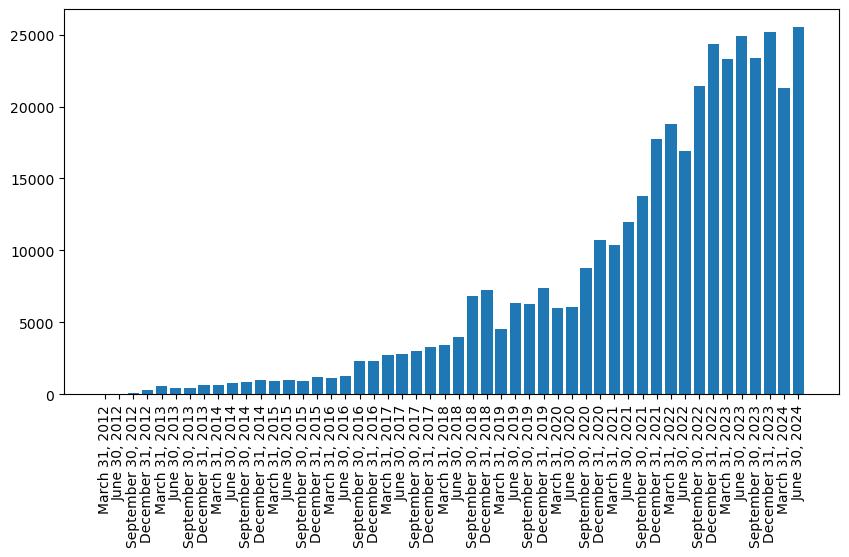

In [48]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
plt.bar(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])

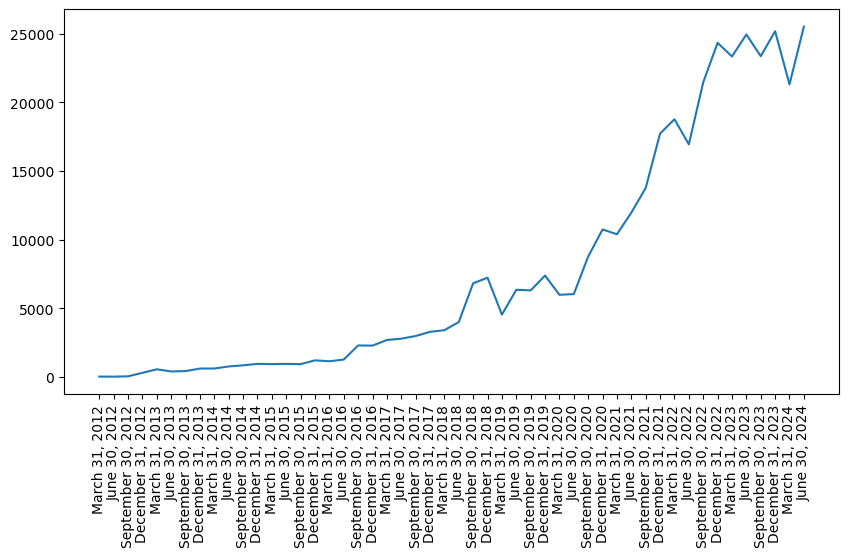

In [51]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
#plt.bar(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.plot(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.show()

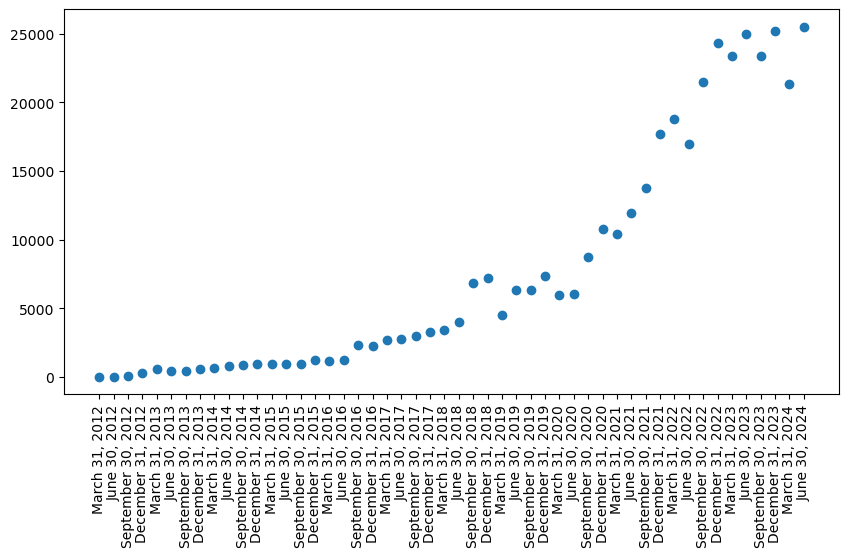

In [52]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
#plt.bar(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.scatter(df_tesla['Fecha'][::-1],df_tesla['Revenue'][::-1])
plt.show()